# Graphs

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


In [3]:
path="/home/ubuntu/EmbrapiiCPqD/OpenRanDatacenterPlacement/open_ran_datacenter_placement/"
jobs = 100
analysis= '4paper'


## Bar Graphs for final ODCs placement for case studies 1

For Manaus, ODCs initial values are 90, 45, 30, 22


In [3]:
# Initialize variables and DataFrames
#CaseStudy = [1, 2, 3, 4]
CaseStudy=['2-2','2-3','2-4']

dfManausCapacitiesStudies = pd.DataFrame()
dfNatalCapacitiesStudies = pd.DataFrame()

dfManausFiberStudies = pd.DataFrame()
dfNatalFiberStudies = pd.DataFrame()

dfManausOdcsStudies = pd.DataFrame()
dfNatalOdcsStudies = pd.DataFrame()

listOdcsManaus=[]
listOdcsNatal=[]

listTotalCapacityManaus = []
listTotalCapacityNatal = []

for icase in CaseStudy:
    dfManausCapacities = pd.DataFrame()
    dfNatalCapacities = pd.DataFrame()
    dfManausFiber = pd.DataFrame()
    dfNatalFiber = pd.DataFrame()
    dfManausOdcs = pd.DataFrame()
    dfNatalOdcs = pd.DataFrame()
    noOdcsManaus = 0
    noOdcsNatal =0
    listCapacityManaus= 0
    listCapacityNatal= 0
    for ijobs in range(jobs):
        # Read the current capacities for Manaus and Natal
        dfManausCurrent_capacities = pd.read_csv(path + "Campaign_ManausCase"+icase+"/data/Job"+str(ijobs+1)+"/df_capacities.csv", usecols=['odc_locations','capacities'])
        dfManausCurrent_capacities = dfManausCurrent_capacities.rename(columns={"odc_locations":"odc_locations_study"+str(icase),"capacities": "capacities_study"+str(icase)})

        dfNatalCurrent_capacities = pd.read_csv(path + "Campaign_NatalCase"+icase+"/data/Job"+str(ijobs+1)+"/df_capacities.csv", usecols=['odc_locations','capacities'])
        dfNatalCurrent_capacities = dfNatalCurrent_capacities.rename(columns={"odc_locations":"odc_locations_study"+str(icase),"capacities": "capacities_study"+str(icase)})

        # Read the current fiber length for Manaus and Natal
        dfManausCurrent_fiber = pd.read_csv(path + "Campaign_ManausCase"+icase+"/data/Job"+str(ijobs+1)+"/df_fiberlength.csv", usecols=['odc_locations','fiberlength'])
        dfManausCurrent_fiber = dfManausCurrent_fiber.rename(columns={"odc_locations":"odc_locations_study"+str(icase),"fiberlength": "fiberlength_study"+str(icase)})
        
        dfNatalCurrent_fiber = pd.read_csv(path + "Campaign_NatalCase"+icase+"/data/Job"+str(ijobs+1)+"/df_fiberlength.csv",usecols=['odc_locations','fiberlength'])
        dfNatalCurrent_fiber = dfNatalCurrent_fiber.rename(columns={"odc_locations":"odc_locations_study"+str(icase),"fiberlength": "fiberlength_study"+str(icase)})
        
        # Read the current ODCs for Manaus and Natal
        dfManausCurrent_odcs = pd.read_csv(path + "Campaign_ManausCase"+icase+"/data/Job"+str(ijobs+1)+"/df_client_association.csv", usecols=['odc_location','oru'])
        dfManausCurrent_odcs = dfManausCurrent_odcs.rename(columns={"odc_location":"odc_locations_study"+str(icase),"oru": "oru_study"+str(icase)})
        
        dfNatalCurrent_odcs = pd.read_csv(path + "Campaign_NatalCase"+icase+"/data/Job"+str(ijobs+1)+"/df_client_association.csv",usecols=['odc_location','oru'])
        dfNatalCurrent_odcs = dfNatalCurrent_odcs.rename(columns={"odc_location":"odc_locations_study"+str(icase),"oru": "oru_study"+str(icase)})
        
        # Calculate the average number of ODCs
        noOdcsManaus = (noOdcsManaus + dfManausCurrent_capacities.shape[0]) / 2
        noOdcsNatal = (noOdcsNatal + dfNatalCurrent_capacities.shape[0]) / 2

        # Calculate total number of CPUs for each city 
        listCapacityManaus = listCapacityManaus + dfManausCurrent_capacities["capacities_study"+str(icase)].sum()
        listCapacityNatal = listCapacityNatal + dfNatalCurrent_capacities["capacities_study"+str(icase)].sum()
        
        # Concatenate the current DataFrames with the overall DataFrames
        dfManausCapacities = pd.concat([dfManausCapacities, dfManausCurrent_capacities], axis=0)
        dfNatalCapacities = pd.concat([dfNatalCapacities, dfNatalCurrent_capacities], axis=0)
        
        dfManausFiber = pd.concat([dfManausFiber, dfManausCurrent_fiber], axis=0)
        dfNatalFiber = pd.concat([dfNatalFiber, dfNatalCurrent_fiber], axis=0)
        
        dfManausOdcs = pd.concat([dfManausOdcs, dfManausCurrent_odcs], axis=0)
        dfNatalOdcs = pd.concat([dfNatalOdcs, dfNatalCurrent_odcs], axis=0)

    listOdcsManaus.append(noOdcsManaus)
    listOdcsNatal.append(noOdcsNatal)

    listTotalCapacityManaus.append(listCapacityManaus/jobs)
    listTotalCapacityNatal.append(listCapacityNatal/jobs)
    
    if icase == 0:
        dfManausCapacities = dfManausCapacities.reset_index(drop=True)
        dfManausCapacitiesStudies = pd.concat([dfManausCapacitiesStudies,dfManausCapacities],axis=0)

        dfNatalCapacities = dfNatalCapacities.reset_index(drop=True)
        dfNatalCapacitiesStudies = pd.concat([dfNatalCapacitiesStudies,dfNatalCapacities],axis=0)

        dfManausFiber = dfManausFiber.reset_index(drop=True)
        dfManausFiberStudies = pd.concat([dfManausFiberStudies,dfManausFiber],axis=0)

        dfNatalFiber = dfNatalFiber.reset_index(drop=True)
        dfNatalFiberStudies = pd.concat([dfNatalFiberStudies,dfNatalFiber],axis=0)
    else:
        dfManausCapacities = dfManausCapacities.reset_index(drop=True)
        dfManausCapacitiesStudies = pd.concat([dfManausCapacitiesStudies,dfManausCapacities],axis=1)
        
        dfNatalCapacities = dfNatalCapacities.reset_index(drop=True)
        dfNatalCapacitiesStudies = pd.concat([dfNatalCapacitiesStudies,dfNatalCapacities],axis=1)

        dfManausFiber = dfManausFiber.reset_index(drop=True)
        dfManausFiberStudies = pd.concat([dfManausFiberStudies,dfManausFiber],axis=1)

        dfNatalFiber = dfNatalFiber.reset_index(drop=True)
        dfNatalFiberStudies = pd.concat([dfNatalFiberStudies,dfNatalFiber],axis=1)



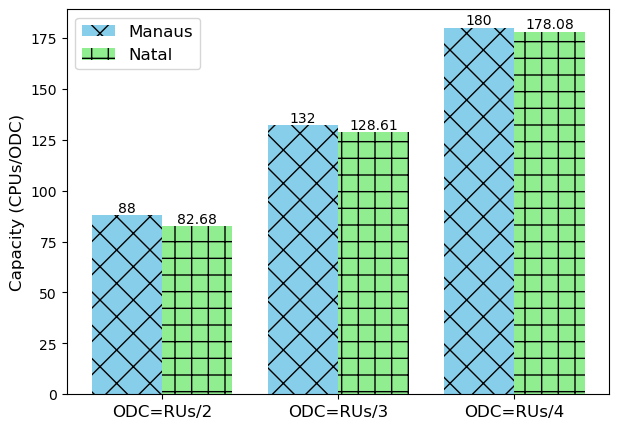

In [33]:
dfManaus = dfManausCapacitiesStudies[['capacities_study2-2','capacities_study2-3','capacities_study2-4']]
dfNatal = dfNatalCapacitiesStudies[['capacities_study2-2','capacities_study2-3','capacities_study2-4']]

df=pd.concat([dfManaus.mean(),dfNatal.mean()],axis=1)
df = df.rename(columns={0:'Manaus',1:'Natal'})

df = round(df*100)/100

# Create the figure and axis
fig, ax = plt.subplots(figsize=(7,5))
#fig, ax = plt.subplots()

# Define positions for bars
x = np.arange(len(df))
bar_width = 0.4

# Plot first set of bars
bars1 = ax.bar(x - bar_width/2, df['Manaus'], bar_width, color='skyblue', label='Manaus',hatch='x')

# Plot second set of bars
bars2 = ax.bar(x + bar_width/2, df['Natal'], bar_width, color='lightgreen', label='Natal',hatch='+')

for bars in ax.containers:
    ax.bar_label(bars)


# Set the labels
ax.set_xticks(x)
ax.set_xticklabels(['ODC=RUs/2','ODC=RUs/3','ODC=RUs/4'], rotation=0, fontsize='12')
#ax.set_xlabel('Locations')
ax.set_ylabel('Capacity (CPUs/ODC)',fontsize='12')
#ax.set_title('Fiber Length by Location')

# Add legend
#ax.legend()
ax.legend(fontsize="12", loc ="upper left")

# Show the plot
plt.savefig("Capacity_"+analysis+".png", dpi=150)
plt.show()



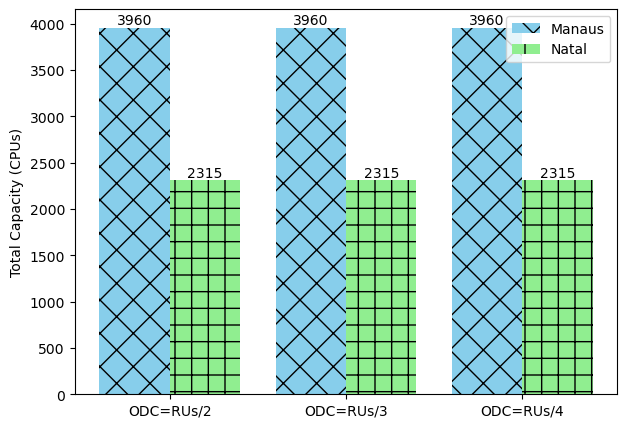

In [31]:
d = {'Manaus': listTotalCapacityManaus[0:3], 'Natal': listTotalCapacityNatal[0:3]}
df = pd.DataFrame(d)

df = round(df*100)/100

# Create the figure and axis
fig, ax = plt.subplots(figsize=(7,5))
#fig, ax = plt.subplots()

# Define positions for bars
x = np.arange(len(df))
bar_width = 0.4

# Plot first set of bars
bars1 = ax.bar(x - bar_width/2, df['Manaus'], bar_width, color='skyblue', label='Manaus',hatch='x')

# Plot second set of bars
bars2 = ax.bar(x + bar_width/2, df['Natal'], bar_width, color='lightgreen', label='Natal',hatch='+')

for bars in ax.containers:
    ax.bar_label(bars)


# Set the labels
ax.set_xticks(x)
ax.set_xticklabels(['ODC=RUs/2','ODC=RUs/3','ODC=RUs/4'], rotation=0)
#ax.set_xlabel('Locations')
ax.set_ylabel('Total Capacity (CPUs)')
#ax.set_title('Fiber Length by Location')

# Add legend
ax.legend()
#ax.legend(["age", "number"], fontsize="12", loc ="upper right")

# Show the plot
plt.savefig("TotalCapacity_"+analysis+".png", dpi=150)
plt.show()

In [6]:
listTotalCapacityManaus

[3960.0, 3960.0, 3960.0]

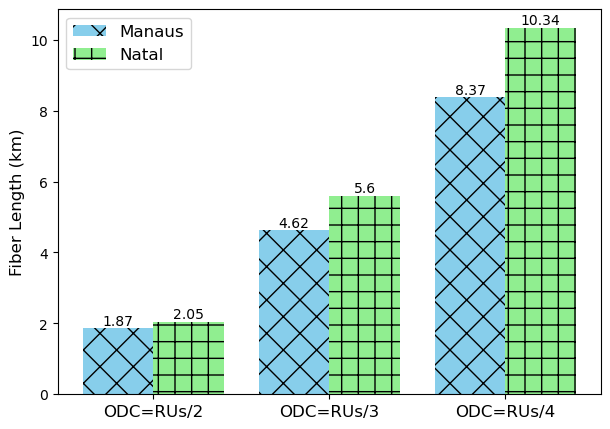

In [32]:
dfManaus = dfManausFiberStudies[['fiberlength_study2-2','fiberlength_study2-3','fiberlength_study2-4']]
dfNatal = dfNatalFiberStudies[['fiberlength_study2-2','fiberlength_study2-3','fiberlength_study2-4']]

df=pd.concat([dfManaus.mean(),
            dfNatal.mean()],axis=1)
df = df.rename(columns={0:'Manaus',1:'Natal'})

df = round(df*100)/100

# Create the figure and axis
fig, ax = plt.subplots(figsize=(7,5))
#fig, ax = plt.subplots()

# Define positions for bars
x = np.arange(len(df))
bar_width = 0.4

# Plot first set of bars
bars1 = ax.bar(x - bar_width/2, df['Manaus'], bar_width, color='skyblue', label='Manaus',hatch='x')

# Plot second set of bars
bars2 = ax.bar(x + bar_width/2, df['Natal'], bar_width, color='lightgreen', label='Natal',hatch='+')

for bars in ax.containers:
    ax.bar_label(bars)


# Set the labels
ax.set_xticks(x)
ax.set_xticklabels(['ODC=RUs/2','ODC=RUs/3','ODC=RUs/4'], rotation=0,fontsize='12')
#ax.set_xlabel('Locations')
ax.set_ylabel('Fiber Length (km)',fontsize='12')
#ax.set_title('Fiber Length by Location')

# Add legend
ax.legend(fontsize='12')

# Show the plot
plt.savefig("Fiberlength_"+analysis+".png", dpi=150)
plt.show()

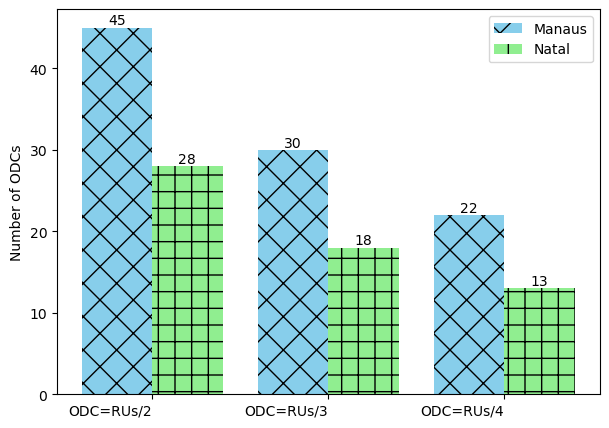

In [8]:
d = {'Manaus': listOdcsManaus[0:3], 'Natal': listOdcsNatal[0:3]}
df = pd.DataFrame(d)

df = round(df*100)/100

# Create the figure and axis
fig, ax = plt.subplots(figsize=(7,5))
#fig, ax = plt.subplots()

# Define positions for bars
x = np.arange(len(df))
bar_width = 0.4

# Plot first set of bars
bars1 = ax.bar(x - bar_width/2, df['Manaus'], bar_width, color='skyblue', label='Manaus',hatch='x')

# Plot second set of bars
bars2 = ax.bar(x + bar_width/2, df['Natal'], bar_width, color='lightgreen', label='Natal',hatch='+')

for bars in ax.containers:
    ax.bar_label(bars)


# Set the labels
ax.set_xticks(x)
ax.set_xticklabels(['ODC=RUs/2','ODC=RUs/3','ODC=RUs/4'], rotation=0, ha='right')
#ax.set_xlabel('Locations')
ax.set_ylabel('Number of ODCs')
#ax.set_title('Fiber Length by Location')

# Add legend
ax.legend()

# Show the plot
plt.savefig("nOdcs_"+analysis+".png", dpi=150)
plt.show()



## Convergence

In [4]:
# Initialize variables and DataFrames
#CaseStudy = [1, 2, 3, 4]
CaseStudy=['2-2','2-3','2-4']
jobs = 1

dfManausConvergenceStudies = pd.DataFrame()
dfNatalConvergenceStudies = pd.DataFrame()

for icase in CaseStudy:
    dfManausConvergence = pd.DataFrame()
    dfNatalConvergence = pd.DataFrame()
    for ijobs in range(jobs):
        # Read the current capacities for Manaus and Natal
        dfManausAlgo_convergence = pd.read_csv(path + "Campaign_ManausCase"+icase+"/data/Job"+str(ijobs+1)+"/dfConvergence.csv", usecols=['generations','avg_obj'])
        dfManausAlgo_convergence = dfManausAlgo_convergence.rename(columns={"generations":"generations_study"+str(icase),"avg_obj": "avg_obj_study"+str(icase)})

        dfNatalAlgo_convergence = pd.read_csv(path + "Campaign_NatalCase"+icase+"/data/Job"+str(ijobs+1)+"/dfConvergence.csv", usecols=['generations','avg_obj'])
        dfNatalAlgo_convergence = dfNatalAlgo_convergence.rename(columns={"generations":"generations_study"+str(icase),"avg_obj": "avg_obj_study"+str(icase)})
       
        # Concatenate the current DataFrames with the overall DataFrames
        dfManausConvergence = pd.concat([dfManausConvergence, dfManausAlgo_convergence], axis=0)
        dfNatalConvergence = pd.concat([dfNatalConvergence, dfNatalAlgo_convergence], axis=0)
    
    if icase == 0:
        dfManausConvergence = dfManausConvergence.reset_index(drop=True)
        dfManausConvergenceStudies = pd.concat([dfManausConvergenceStudies,dfManausConvergence],axis=0)

        dfNatalConvergence = dfNatalConvergence.reset_index(drop=True)
        dfNatalConvergenceStudies = pd.concat([dfNatalConvergenceStudies,dfNatalConvergence],axis=0)

    else:
        dfManausConvergence = dfManausConvergence.reset_index(drop=True)
        dfManausConvergenceStudies = pd.concat([dfManausConvergenceStudies,dfManausConvergence],axis=1)

        dfNatalConvergence = dfNatalConvergence.reset_index(drop=True)
        dfNatalConvergenceStudies = pd.concat([dfNatalConvergenceStudies,dfNatalConvergence],axis=1)



#### Manaus

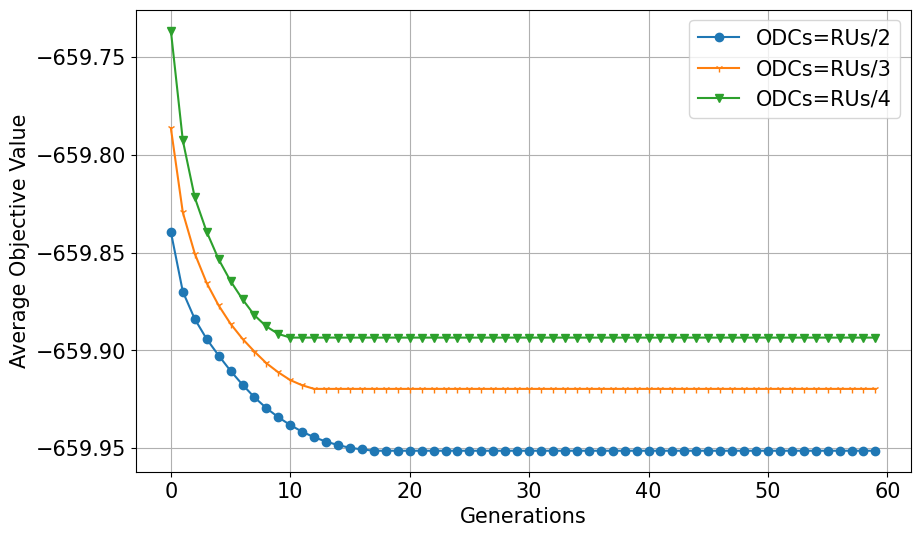

In [6]:
# Extract unique study identifiers
studies = sorted(set(col.split('_')[2] for col in dfManausConvergenceStudies.columns if 'avg_obj' in col))
label = ['ODCs=RUs/2','ODCs=RUs/3','ODCs=RUs/4']
markers=['o','1','v']

# Plotting
plt.figure(figsize=(10, 6))
i=0
for study in studies:
    generations_col = f'generations_{study}'
    avg_obj_col = f'avg_obj_{study}'
    plt.plot(dfManausConvergenceStudies[generations_col], dfManausConvergenceStudies[avg_obj_col], marker=markers[i], label=label[i])
    i+=1

plt.xlabel('Generations',fontsize='15')
plt.ylabel('Average Objective Value',fontsize='15')
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
#plt.title('Manaus')
plt.legend(fontsize='15')
plt.grid(True)
plt.savefig("ConvergencePlot_Manaus.png", dpi=150)
plt.show()

#### Natal

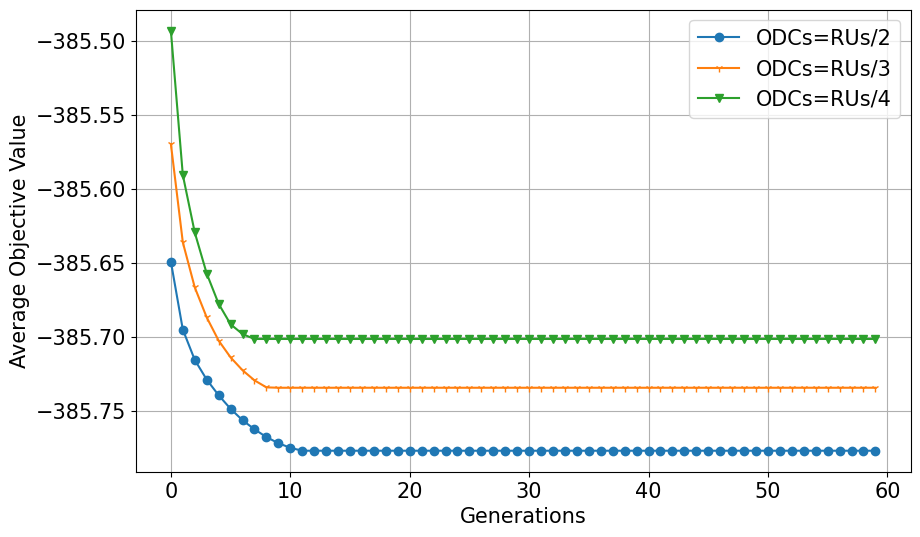

In [7]:
# Extract unique study identifiers
studies = sorted(set(col.split('_')[2] for col in dfNatalConvergenceStudies.columns if 'avg_obj' in col))
label = ['ODCs=RUs/2','ODCs=RUs/3','ODCs=RUs/4']
markers=['o','1','v']

# Plotting
plt.figure(figsize=(10, 6))
i=0
for study in studies:
    generations_col = f'generations_{study}'
    avg_obj_col = f'avg_obj_{study}'
    plt.plot(dfNatalConvergenceStudies[generations_col], dfNatalConvergenceStudies[avg_obj_col], marker=markers[i], label=label[i])
    i+=1

plt.xlabel('Generations',fontsize='15')
plt.ylabel('Average Objective Value',fontsize='15')
plt.xticks(fontsize='15')
plt.yticks(fontsize='15')
#plt.title('Natal')
plt.legend(fontsize='15')
plt.grid(True)
plt.savefig("ConvergencePlot_Natal.png", dpi=150)
plt.show()